In [8]:
import time

from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from io import StringIO,BytesIO
from PIL import Image
from tensorflow.keras.models import load_model
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster  as skc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plt 用于显示图片
from sklearn.decomposition import PCA, IncrementalPCA

#启动指定端口jar包 java -jar selenium-server-standalone-3.141.59.jar -port 55151


In [15]:
url='https://cmcoins.boc.cn/CoinSeller/ImageValidation/validation1512712177016.gif'
driver = webdriver.Remote(command_executor='http://39.98.140.65:55151/wd/hub',desired_capabilities=DesiredCapabilities.FIREFOX)
driver.get(url)





In [25]:
driver.page_source
ele=driver.find_elements_by_tag_name('img')[0]


In [28]:
img=ele.screenshot_as_png
img=Image.open(BytesIO(img))
img

In [12]:
from selenium import webdriver
driver = webdriver.Remote(command_executor='http://39.98.140.65:55151/wd/hub',desired_capabilities=DesiredCapabilities.FIREFOX)
driver.get(url)
url = 'https:www.baidu.com'
print(driver.page_source)#打印网页源代码
driver.close()#关闭浏览器

<html><head><meta name="viewport" content="width=device-width; height=device-height;"><link rel="stylesheet" href="resource://content-accessible/ImageDocument.css"><link rel="stylesheet" href="resource://content-accessible/TopLevelImageDocument.css"><link rel="stylesheet" href="chrome://global/skin/media/TopLevelImageDocument.css"><title>validation1512712177016.gif (GIF Image, 120&nbsp;×&nbsp;28 pixels)</title></head><body><img src="https://cmcoins.boc.cn/CoinSeller/ImageValidation/validation1512712177016.gif" alt="https://cmcoins.boc.cn/CoinSeller/ImageValidation/validation1512712177016.gif"></body></html>


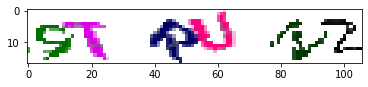

[[ 1.07734343 -1.70473948 -0.25784796  1.8235058  -0.32502748]
 [ 1.37096809 -1.70473948 -0.25784796  1.8235058  -0.32502748]
 [-0.68440454 -1.60234469 -1.02766597  0.97160843 -1.32620159]
 ...
 [ 1.07734343  1.81081514 -0.58916204 -0.27784104 -0.75591254]
 [ 1.07734343  1.84494673 -0.96919878 -1.01615209 -1.25016305]
 [ 1.07734343  1.87907833 -1.02766597 -1.1297384  -1.32620159]]
字母分离失败
1


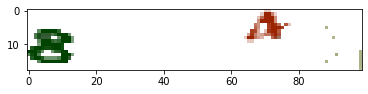

[[ 0.85556762 -1.05265191 -1.17278832 -0.67520908 -0.90886192]
 [ 1.1070301  -1.05265191 -0.09665916  0.68791889  0.54649762]
 [ 0.60410513 -1.02303677 -0.8221395  -0.22083309 -0.43464364]
 [ 0.85556762 -1.02303677 -1.17278832 -0.67520908 -0.90886192]
 [ 1.1070301  -1.02303677 -1.0397836  -0.50998144 -0.72898602]
 [ 1.35849258 -1.02303677 -0.79795682 -0.20017963 -0.40193893]
 [-0.40174479 -0.99342163 -0.21757255  0.52269126  0.38297407]
 [-0.15028231 -0.99342163 -0.21757255  0.52269126  0.38297407]
 [ 0.60410513 -0.99342163 -1.17278832 -0.67520908 -0.90886192]
 [ 0.85556762 -0.99342163 -1.17278832 -0.67520908 -0.90886192]
 [ 1.1070301  -0.99342163 -1.17278832 -0.67520908 -0.90886192]
 [ 1.35849258 -0.99342163 -1.17278832 -0.67520908 -0.90886192]
 [-0.65320727 -0.96380648 -0.02411113  0.77053271  0.64461174]
 [-0.40174479 -0.96380648 -0.88259619 -0.44802108 -0.51640541]
 [-0.15028231 -0.96380648 -0.83423083 -0.40671417 -0.450996  ]
 [ 0.10118017 -0.96380648 -0.02411113  0.77053271  0.64

KeyboardInterrupt: 

In [371]:
driver = webdriver.Remote(command_executor='http://39.100.230.211:55151/wd/hub',desired_capabilities=DesiredCapabilities.FIREFOX)
driver.get("https://cmcoins.boc.cn/BOC15_CoinSeller/welcome.html")

# def run_thread(driver):
# index=choose_series(id_list)
# person=id_list.iloc[index,:]

请选择产品 = driver.find_element_by_id('sel_coin_product')
请选择产品.click()
产品=请选择产品.find_element_by_tag_name('ul')
产品.click()
driver.find_element_by_link_text('同意并继续预约').click()

(客户姓名,手机号码,证件号码)=driver.find_elements_by_tag_name('input')
客户姓名.click()
客户姓名.send_keys(str(person['name']))
手机号码.click()
手机号码.send_keys(str(person['phone']))
证件号码.click()
证件号码.send_keys(str(person['id']))

兑换网点=driver.find_element_by_link_text('选择')
兑换网点.click()

省份=driver.find_element_by_id('sel_province')
省份.click()
for ele in 省份.find_elements_by_tag_name('li'):
    if ele.get_attribute('val')=='云南省':#'山西省':
        ele.click()
        break
        
# 城市=driver.find_element_by_id('sel_city')
# 城市.click()
# for ele in 城市.find_elements_by_tag_name('li'):
#     if ele.get_attribute('val')=='运城市':
#         ele.click()
#         break

搜索=driver.find_element_by_id('txtSearchName')
搜索.click()
# 搜索.send_keys('运城市分行营业部\n')
搜索.send_keys('迪庆州分行')

driver.find_element_by_class_name('chBranch').click()

driver.find_element_by_link_text('下一步').click()


while(True):
    验证码框=driver.find_element_by_id('captcha')
    验证码=验证码框.screenshot_as_png
    验证码=Image.open(BytesIO(验证码))
    captcha=identifyCaptcha(验证码,model)
    print(1)
    if captcha!='':
        break
    else:
        driver.find_element_by_link_text('刷新').click()
输入框=driver.find_element_by_id('txt_captcha_79449')
输入框.click()
输入框.send_keys(str(captcha))
# driver.find_element_by_link_text('确认').click()

In [453]:
img